# BUILDING A LANGUAGE DETECTION MODEL 

# Problem Statement:
                     
                     This project was created in an attempt to to identify the language in which a document, message, or                        sentence is written.To achieve this goal,I propose the following methodology.
                     1) I transform a text into numerical form by creating a Bag of Words model using CountVectorizer.
                     2) I build a machine-learned classifier to predict the language in which a text is written.
                     3) I evaluate the performance of the approach proposed here on a variety of datasets.


#### About the dataset
I am using the Language Detection dataset, which contains text details for 17 different languages.

Languages are:

* English

* Portuguese

* French

* Greek

* Dutch

* Spanish

* Japanese

* Russian

* Danish

* Italian

* Turkish

* Swedish

* Arabic

* Malayalam

* Hindi

* Tamil

* Telugu

Using the text I will be creating a model which will be able to predict the given language. This is a solution for many artificial intelligence applications and computational linguists. These kinds of prediction systems are widely used in electronic devices such as mobiles, laptops, etc for machine translation, and also on robots. It helps in tracking and identifying multilingual documents too.

So let’s get started. First of all, I import all the required libraries.



##### Importing libraries:

In [2]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
import tkinter as tk
warnings.simplefilter("ignore")

##### Loading Dataset:

In [3]:
data = pd.read_csv("Downloads/Language Detection.csv")
data.head(25)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [4]:
data["Language"].value_counts()


English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [5]:
data.columns

Index(['Text', 'Language'], dtype='object')

In [6]:
data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


#### Seperating Independent and Dependent features:

         Now,the task is to separate the dependent and independent variables, here text data is the independent variable and the language name is the dependent variable.



In [7]:
X = data["Text"]
y = data["Language"]

#### Label Encoding:

Here,the output variable, the name of languages is a categorical variable. For training the model,it is necessary to convert it into a numerical form, so i am  performing label encoding on that output variable. For this process, i am importing LabelEncoder from sklearn.

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#### Text Preprocessing:
This is a dataset created using scraping the Wikipedia, so it contains many unwanted symbols, numbers which will affect the quality of our model. So we should perform text preprocessing techniques.

In [9]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

#### Bag of Words:
As we all know that, not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(10337, 34937)

#### Train Test Splitting:
We preprocessed our input and output variable. The next step is to create the training set, for training the model and test set, for evaluating the test set. For this process, we are using a train test split.

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


     Here,I am gonna use five different classifier algorithms and then compare them to pick the best model among them for            buliding the best language detection model.

# NAIVE BAYES MODEL

### MULTINOMIAL NAIVE BAYES:

#### Model Training and Prediction:
Here comes the model creation part.
I am using the Multinomial naive_bayes algorithm for our model creation. Later I am  training the model using the training set.



In [12]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

So I’ve trained our model using the training set. Now I am gonna predict the output for the test set.



In [13]:
y_pred_NB = model.predict(x_test)
y_pred_NB

array([ 1, 13,  8, ...,  2, 10,  2])

#### Model Evaluation
Now I will evaluate our model

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
ac_NB = accuracy_score(y_test, y_pred_NB)
cm_NB = confusion_matrix(y_test, y_pred_NB,)
pr_NB = precision_score(y_test,y_pred_NB,average='macro')
rc_NB = recall_score(y_test,y_pred_NB,average='macro')
f1_NB = f1_score(y_test,y_pred_NB,average='macro')

print("Accuracy is :",ac_NB)
print("Precision Score is :",pr_NB)
print("Recall Score is :",rc_NB)
print("F1 Score is",f1_NB)



Accuracy is : 0.9753384912959381
Precision Score is : 0.9855675632172269
Recall Score is : 0.9738171538986287
F1 Score is 0.9792937440036426


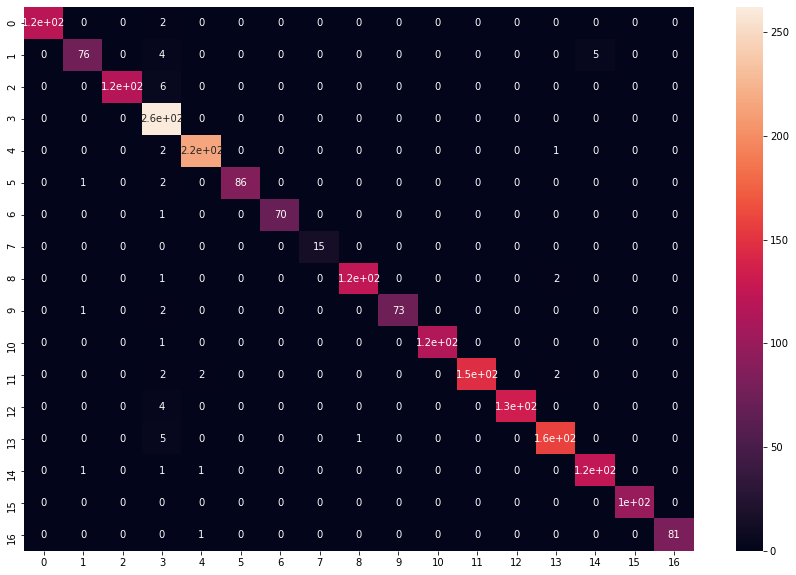

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(cm_NB, annot = True)
plt.show()

### GAUSSIAN NAIVE BAYES:

#### Model Training and Prediction:
Here comes the model creation part.
I am using the Gaussian naive_bayes algorithm for our model creation. Later I am  training the model using the training set.



In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

So I’ve trained our model using the training set. Now I am gonna predict the output for the test set.


In [17]:
y_pred_GNB = model.predict(x_test)
y_pred_GNB

array([ 1, 13,  8, ...,  2, 10,  2])

#### Model Evaluation
Now I ll  evaluate our model

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
ac_GNB = accuracy_score(y_test, y_pred_GNB)
cm_GNB = confusion_matrix(y_test, y_pred_GNB,)
pr_GNB = precision_score(y_test,y_pred_GNB,average='macro')
rc_GNB = recall_score(y_test,y_pred_GNB,average='macro')
f1_GNB = f1_score(y_test,y_pred_GNB,average='macro')

print("Accuracy is :",ac_GNB)
print("Precision Score is :",pr_GNB)
print("Recall Score is :",rc_GNB)
print("F1 Score is",f1_GNB)



Accuracy is : 0.9738878143133463
Precision Score is : 0.9696760972991458
Recall Score is : 0.9746132185268174
F1 Score is 0.9713100335107723


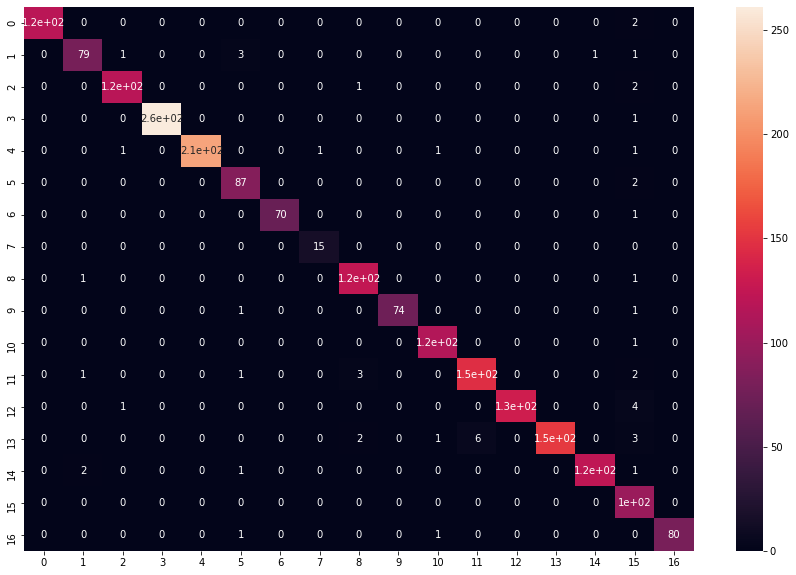

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(cm_GNB, annot = True)
plt.show()

# LOGISTIC REGRESSION MODEL

#### Model Training and Prediction:
Here comes the model creation part.
I am using the Logistic regression algorithm for our model creation. Later I am  training the model using the training set.



In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

So I’ve trained our model using the training set. Now I am gonna predict the output for the test set.


In [21]:
y_pred_LR = model.predict(x_test)
y_pred_LR

array([ 1, 13,  8, ...,  2, 10,  2])

#### Model Evaluation
Now I ll evaluate our model for the test set.


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
ac_LR = accuracy_score(y_test, y_pred_LR)
cm_LR = confusion_matrix(y_test, y_pred_LR,)
pr_LR = precision_score(y_test,y_pred_LR,average='macro')
rc_LR = recall_score(y_test,y_pred_LR,average='macro')
f1_LR = f1_score(y_test,y_pred_LR,average='macro')

print("Accuracy is :",ac_LR)
print("Precision Score is :",pr_LR)
print("Recall Score is :",rc_LR)
print("F1 Score is",f1_LR)



Accuracy is : 0.9429400386847195
Precision Score is : 0.9596445360454288
Recall Score is : 0.9339194609429093
F1 Score is 0.9437781164128538


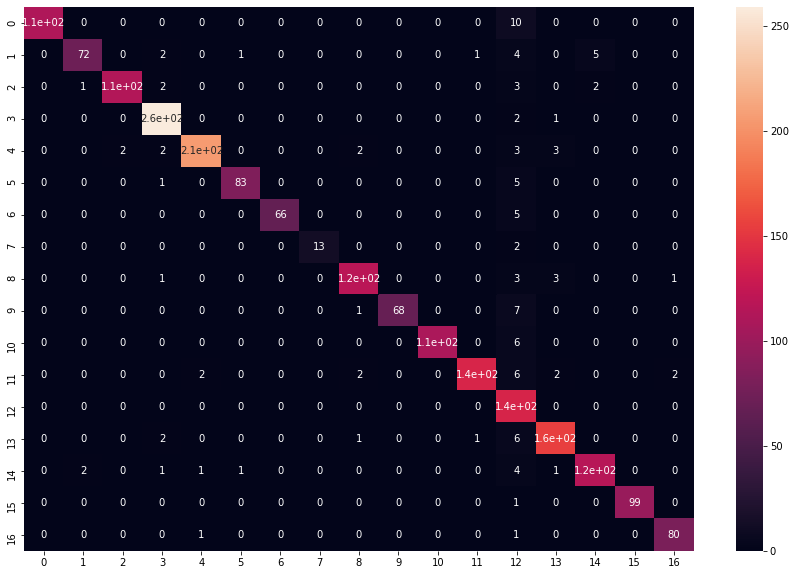

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(cm_LR, annot = True)
plt.show()

# DECISIONTREE CLASSIFIER MODEL

#### Model Training and Prediction:
Here comes the model creation part.
I am using the Decision Tree Classifier algorithm for our model creation. Later I am  training the model using the training set.



In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

So I’ve trained our model using the training set. Now,I am gonna predict the output for the test set.


In [25]:
y_pred_DTC = model.predict(x_test)
y_pred_DTC

array([ 1, 13,  8, ...,  2, 10,  1])

#### Model Evaluation
Now,I will evaluate our model

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
ac_DTC = accuracy_score(y_test, y_pred_DTC)
cm_DTC = confusion_matrix(y_test, y_pred_DTC,)
pr_DTC = precision_score(y_test,y_pred_DTC,average='macro')
rc_DTC = recall_score(y_test,y_pred_DTC,average='macro')
f1_DTC = f1_score(y_test,y_pred_DTC,average='macro')

print("Accuracy is :",ac_DTC)
print("Precision Score is :",pr_DTC)
print("Recall Score is :",rc_DTC)
print("F1 Score is",f1_DTC)



Accuracy is : 0.8549323017408124
Precision Score is : 0.8898195707622729
Recall Score is : 0.8563930930062895
F1 Score is 0.8624217037381077


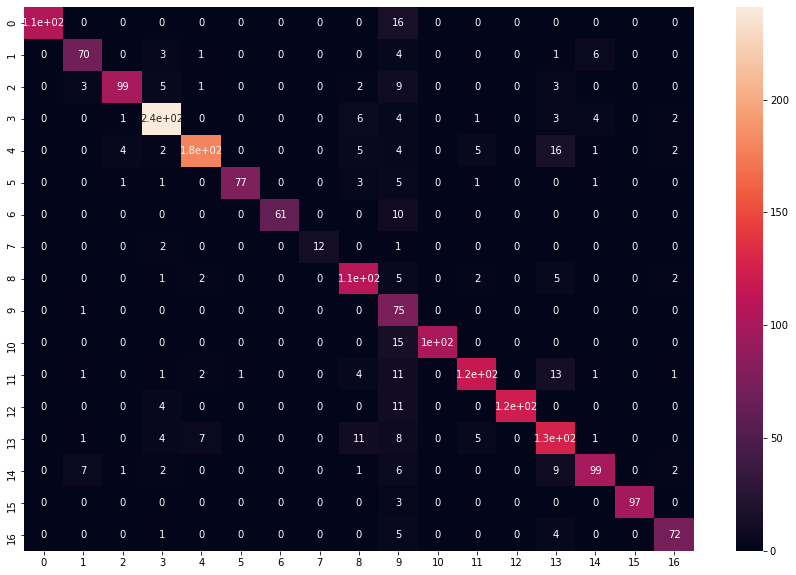

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(cm_DTC, annot = True)
plt.show()

# RANDOM FOREST CLASSIFIER MODEL

#### Model Training and Prediction:
Here comes the model creation part.
I am using the Random Forest Classifier algorithm for our model creation. Later I am  training the model using the training set.



In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

So I’ve trained our model using the training set. Now,I am gonna predict the output for the test set.


In [29]:
y_pred_RFC = model.predict(x_test)
y_pred_RFC

array([ 1, 13,  8, ...,  2, 10,  2])

#### Model Evaluation
Now,I will evaluate our model

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
ac_RFC = accuracy_score(y_test, y_pred_RFC)
cm_RFC = confusion_matrix(y_test, y_pred_RFC,)
pr_RFC = precision_score(y_test,y_pred_RFC,average='macro')
rc_RFC = recall_score(y_test,y_pred_RFC,average='macro')
f1_RFC = f1_score(y_test,y_pred_RFC,average='macro')

print("Accuracy is :",ac_RFC)
print("Precision Score is :",pr_RFC)
print("Recall Score is :",rc_RFC)
print("F1 Score is",f1_RFC)



Accuracy is : 0.9216634429400387
Precision Score is : 0.9379662260194395
Recall Score is : 0.9175444446385361
F1 Score is 0.9208687777425719


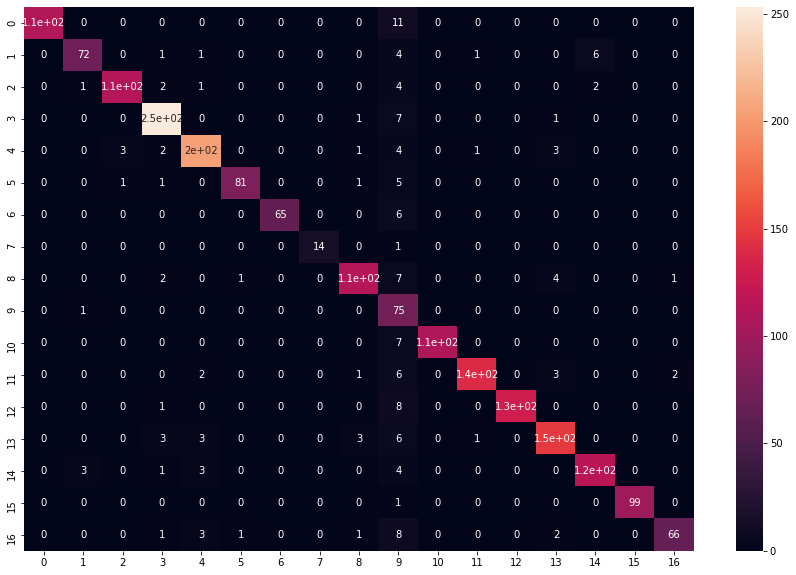

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(cm_RFC, annot = True)
plt.show()

### Comparing Models
In this last section, I will compare the accuracy, precision, recall, and F1 Scores of each algorithm I used. I will plot them on bar charts to give us a graphical representation of how the different models compare to each other.

#### Comparing Model Accuracy:

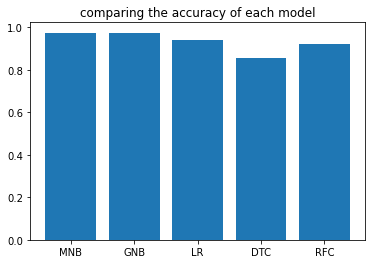

In [32]:
Accuracy = [ac_NB,ac_GNB,ac_LR,ac_DTC,ac_RFC]
Methods = ['MNB','GNB','LR', 'DTC', 'RFC']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('comparing the accuracy of each model')
plt.show()

As we can see in the barplot above,Multinomial Naive Bayes has the highest accuracy of all of the algorithms with 98% correct predictions. Gaussian Naive bayes and  Logistic Regressions algorithms are also close with 97% and 95% accuracy respectively.
Whereas,Decision Trees and Random Forest algorithms have comparitively less accuracy values of about 85% and 92% respectively.

 #### Comparing Model Precision:

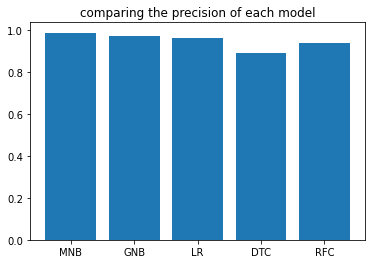

In [33]:
Precision = [pr_NB,pr_GNB,pr_LR,pr_DTC,pr_RFC]
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('comparing the precision of each model')
plt.show()

Multinomial Naive Bayes is the most precise model, with a precision of 98.8%, whereas Gaussian Naive bayes,Logistic Regression,Random forest have 96.9%,96.6,94.3% respectively.Decision tree classifier have the lowest precision rate of about 88.7%.

#### Comparing Model Recall:

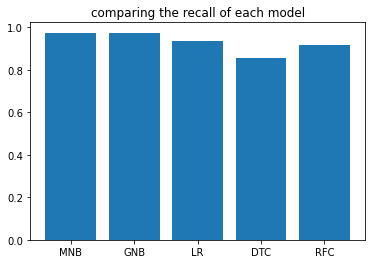

In [34]:
Recall = [rc_NB,rc_GNB,rc_LR,rc_DTC,rc_RFC]
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('comparing the recall of each model')
plt.show()

MultiNomial Naive Bayes and Gaussian Naive Bayes have the highest recall of about 97.7%, whereas Logistic Regression,Random Forest Classifier, have a recall of 94.1%,92.4% respectively. Decision Trees has the lowest recall with 86.1%


#### Comparing Model F1 Scores:

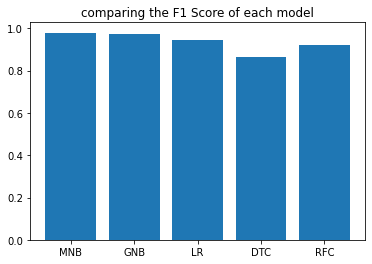

In [35]:
F1_Score = [f1_NB,f1_GNB,f1_LR,f1_DTC,f1_RFC]
F1_Score_pos = np.arange(len(Methods))
plt.bar(F1_Score_pos, F1_Score)
plt.xticks(F1_Score_pos, Methods)
plt.title('comparing the F1 Score of each model')
plt.show()

Multinomial Naive Bayes has the highest F1 score of 98.3%
Gaussian Naive Bayes,Logistic Regression,Random Forest Classifier have an F1 score of 97.2%,95.1%,92.6% respectively.
Decision Trees has the lowest F1 Score of 86.39%


Out of the 5 algorithms used in this project, the most accurate and precise was the Multinomial Naive Bayes algorithm.Therfore i am going to use build my language detection model using Multinomial Naive Bayes and deploy it as a GUI model by importing TKinter library.

In [36]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

### Deploying the model as a GUI

In [37]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The language is in",lang[0]) # printing the language

In [38]:
la=str()
def onClick():
    row= entertext.get()
    print(row)
    x = cv.transform([row]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    root2 = tk.Tk()
    root2.title("Prediction Window")
    la = lang[0]
    print("The language is in",lang[0])
    tk.Label(root2, text=la, font=("times new roman", 20), fg="white", bg="maroon", height=2).grid(row=0, column=1)
root = tk.Tk()
root.title("Language Detector:")
tk.Label(root,text="""Enter the text to detect which language it belongs  to:""",font=("times new roman", 12)).grid(row=0)
tk.Label(root,text='Text:',padx=20, font=("times new roman", 12)).grid(row=1,column=0)
entertext = tk.StringVar()
tk.Entry(root,textvariable=entertext).grid(row=1,column=1)

tk.Button(root, text='Predict', command=onClick).grid(row=11, column=1)

root.mainloop()


    

j"m appelle sarika
The language is in French
